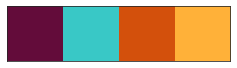

In [3]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import numpy as np
import os
import pandas as pd
# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [4]:
# Import my spotify data
songs = pd.read_csv("./spotify_data/mySongsDataset.csv")
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          214 non-null    object 
 1   artist        214 non-null    object 
 2   id            214 non-null    object 
 3   danceability  214 non-null    float64
 4   energy        214 non-null    float64
 5   loudness      214 non-null    float64
 6   speechiness   214 non-null    float64
 7   acousticness  214 non-null    float64
 8   tempo         214 non-null    float64
 9   liveness      214 non-null    float64
 10  valence       214 non-null    float64
dtypes: float64(8), object(3)
memory usage: 18.5+ KB


In [5]:

songs = songs.drop(['energy','valence','tempo'],axis=1)
songs.head()

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness
0,Eastside (with Halsey & Khalid),benny blanco,0d2iYfpKoM0QCKvcLCkBao,0.560,-7.648,0.3210,0.555,0.1160
1,Young Dumb & Broke,Khalid,5Z3GHaZ6ec9bsiI5BenrbY,0.798,-6.351,0.0421,0.199,0.1650
2,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,3KkXRkHbMCARz0aVfEt68P,0.760,-5.574,0.0466,0.556,0.0703
3,Lonely (feat. MAX),Matoma,0IL20mzbwXaGVRrcan6AOB,0.588,-4.558,0.0559,0.148,0.2370
4,Silence,Marshmello,7vGuf3Y35N4wmASOKLUVVU,0.520,-3.093,0.0853,0.256,0.1700


In [6]:
# to describe numerical features we can use describe()
songs.describe()

,danceability,loudness,speechiness,acousticness,liveness
count,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.645607,-6.336159,0.089504,0.255387,0.172649
std,0.132637,2.623228,0.086559,0.225928,0.134207
min,0.265000,-14.679000,0.023200,0.000239,0.034400
25%,0.580000,-7.577500,0.038500,0.061075,0.093300
50%,0.670500,-5.604500,0.052950,0.208500,0.123500
75%,0.731750,-4.581000,0.099075,0.368750,0.204000
max,0.965000,-1.190000,0.463000,0.899000,0.942000


array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'liveness'}>, <AxesSubplot:>]],
      dtype=object)

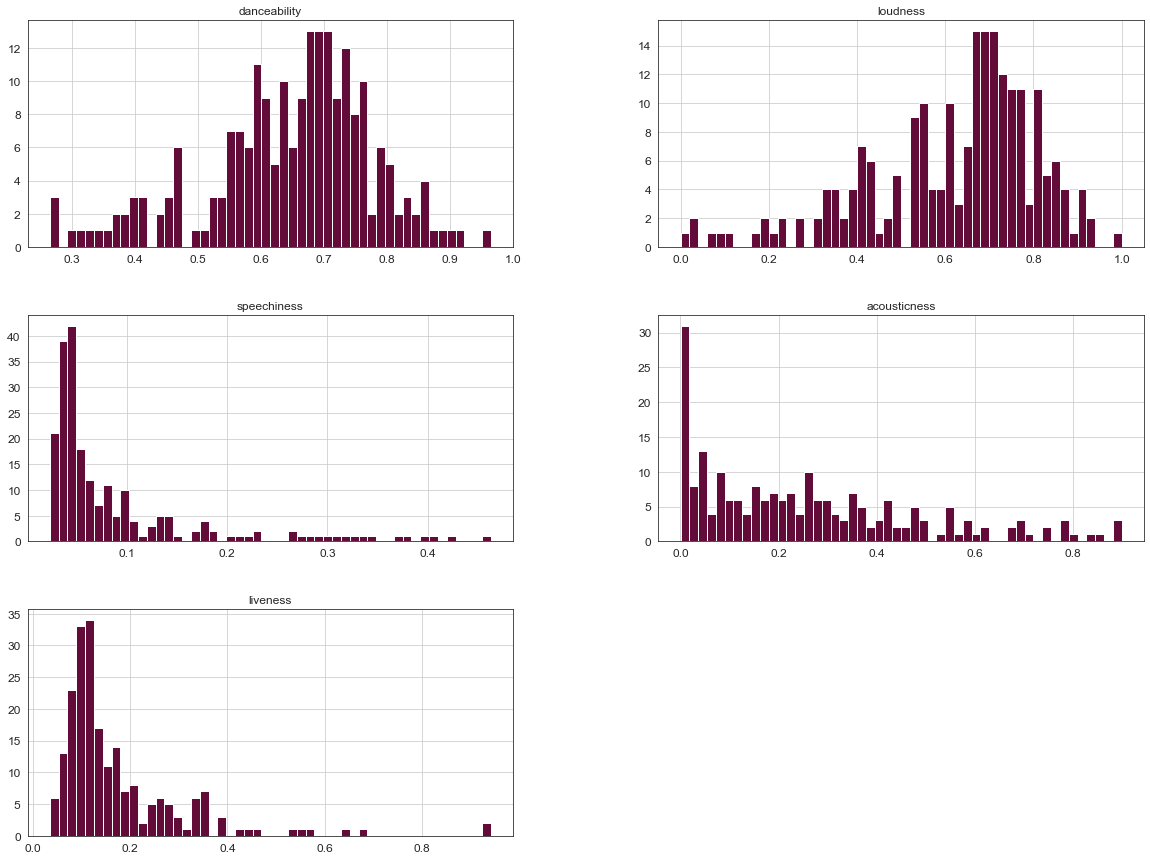

In [7]:
# Loudness feature is from -60db to 0 so we will normalise this column between 0 and 1
# Tempo feature is in BPM so we will scale between 0 and 1 too
from sklearn import preprocessing

loudness = songs[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
songs['loudness'] = pd.DataFrame(loudness_scaled)
songs.hist(bins=50,figsize=(20,15))

Most features are skewed to the left or the right


In [8]:
# from pandas.plotting import scatter_matrix
# attributes should contain the features we want to compare
# attr = ['danceability','energy','loudness','speechiness','acousticness','tempo','liveness','valence']
# pd.plotting.scatter_matrix(songs,figsize=(12,8))

In [45]:
# remove song names, artist and id before clustering
songs_features = songs.copy()
songs_features = songs_features.drop(['name','artist','id'],axis=1)

print(songs_features.head())

     danceability  loudness  speechiness  acousticness  liveness  label
172         0.756  0.865001       0.1290       0.34600    0.6390      3
58          0.546  0.690489       0.0784       0.00546    0.3820      1
143         0.670  0.761732       0.3080       0.20900    0.3460      1
165         0.632  0.540218       0.0354       0.15100    0.1140      1
2           0.760  0.674994       0.0466       0.55600    0.0703      3


In [46]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

In [47]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,10):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6589068306706105)
For n_clusters = 3, silhouette score is 0.6661128197464795)
For n_clusters = 4, silhouette score is 0.7240057674567709)
For n_clusters = 5, silhouette score is 0.5362678110244745)
For n_clusters = 6, silhouette score is 0.49377137963344697)
For n_clusters = 7, silhouette score is 0.3081147516418035)
For n_clusters = 8, silhouette score is 0.3140001519169217)
For n_clusters = 9, silhouette score is 0.27493490803866477)


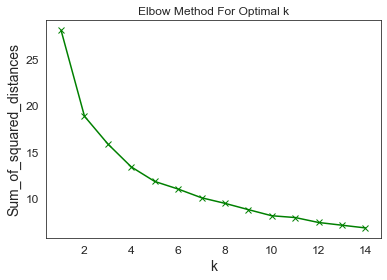

In [12]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(songs_features)


KMeans(n_clusters=4)

In [14]:
# PCA to reduce our data to 2 dimensions for visualisation
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)


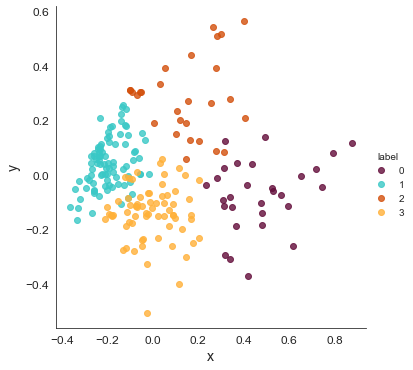

In [15]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)


In [16]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)

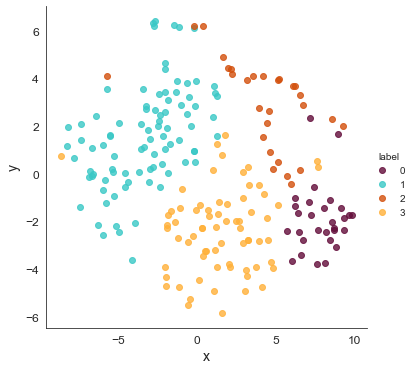

In [17]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [18]:
pca.explained_variance_ratio_

array([0.4652487 , 0.22740114])

The explained variance tells you how much information (variance) can be attributed to each of the principal components. By looking at the explained_variance_ratio_ we can see the 1st component contains 87% and the 2nd 5% which implies we've retained 92% of the original variance in the data which is awesome! 

In [19]:
# Dump components relations with features:
print (pd.DataFrame(pca.components_,columns=songs_features.columns,index = ['PC-1','PC-2']))


      danceability  loudness  speechiness  acousticness  liveness
PC-1     -0.187765 -0.531064    -0.042968      0.821275 -0.079854
PC-2     -0.164676 -0.807359    -0.065724     -0.562778  0.003853


# Next step lets explore each of the 4 clusters and see what songs they contain

In [20]:
songs['label'] = y_kmeans

# shuffle dataset

songs = songs.sample(frac=1)
songs['label'].value_counts()

1    88
3    69
0    29
2    28
Name: label, dtype: int64

In [21]:
songs[songs['label'] == 0].tail(50)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
207,Otha Sollaala,G. V. Prakash,7lnRiEP7BHXuILXNY9MH8f,0.707,0.667507,0.1850,0.681,0.0748,0
74,We Will Rock You - Remastered,Queen,4pbJqGIASGPr0ZpGpnWkDn,0.692,0.545852,0.1190,0.676,0.2590,0
213,Nenjukkul Peidhidum,Harris Jayaraj,4vlMdXsRpAIXYggwbNHZSv,0.687,0.323894,0.0407,0.600,0.1320,0
146,"Ilamai Thirumbudhe - From ""Petta""",Anirudh Ravichander,4IUGuoJ41g5fLIqsO1MJoU,0.395,0.523612,0.0625,0.719,0.1750,0
206,Nallai Allai,A.R. Rahman,7gwuIhFmNaf3wcRWG1WadD,0.579,0.397064,0.0253,0.803,0.0430,0
201,Neeyae,Vivek - Mervin,1MZbccVLcsHx8jH4wcfbBs,0.446,0.548447,0.0369,0.566,0.1030,0
123,Pookkal Pookkum,G. V. Prakash,7hMKAmUlUUYa5qEiHWK4bk,0.589,0.198161,0.0359,0.844,0.1690,0
127,Saayndhu Saayndhu,Ilaiyaraaja,0f6cGe7JVOKXfTUZCvj43L,0.658,0.353547,0.0315,0.746,0.3480,0
115,Moongil Thottam,A.R. Rahman,5PNZX8yqzqqAMPpl3UAoaP,0.501,0.265846,0.0291,0.891,0.1010,0
112,Mistletoe,Justin Bieber,7xapw9Oy21WpfEcib2ErSA,0.657,0.417377,0.0467,0.498,0.0794,0


In [22]:
songs[songs['label']==1].head(15)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
58,The Greatest Show,Panic! At The Disco,55PZSFcKQxXH5BOOcDA6yI,0.546,0.690489,0.0784,0.00546,0.382,1
143,Karuthavanlaam Galeejaam,Anirudh Ravichander,22cCckQ9DR4E94QhtUzSW3,0.670,0.761732,0.3080,0.20900,0.346,1
165,Sirikkadhey,Anirudh Ravichander,4NQBqInyE7zvjIiP4j1dmy,0.632,0.540218,0.0354,0.15100,0.114,1
84,Sorry,Justin Bieber,09CtPGIpYB4BrO8qb1RGsF,0.654,0.816221,0.0450,0.07970,0.299,1
163,"The Karma Theme - From ""U Turn""",Anirudh Ravichander,0SOAuohGmdPWKnBxGiwJkn,0.580,0.720068,0.0415,0.00826,0.069,1
47,Something Just Like This,The Chainsmokers,6RUKPb4LETWmmr3iAEQktW,0.617,0.586404,0.0317,0.04980,0.164,1
18,Attention,Charlie Puth,5cF0dROlMOK5uNZtivgu50,0.775,0.748239,0.0542,0.10900,0.134,1
79,You're Such A,Hailee Steinfeld,3QTDzwSkRW04FVPo6COm0H,0.620,0.619468,0.0997,0.00798,0.113,1
3,Lonely (feat. MAX),Matoma,0IL20mzbwXaGVRrcan6AOB,0.588,0.750315,0.0559,0.14800,0.237,1
80,Youngblood,5 Seconds of Summer,2iUXsYOEPhVqEBwsqP70rE,0.596,0.709096,0.4630,0.01690,0.124,1


In [23]:
songs[songs['label']==2].head(30)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
193,Endrendrum Punnagai,Srinivas,5AyO1AcPP8z6fu79MGsAW9,0.853,0.103269,0.0413,0.15800,0.0487,2
185,June Ponal,Krishh,27NYlc5sc4WpfaGfL3oBao,0.740,0.389206,0.0476,0.03830,0.1620,2
130,Kanmoodi,Devi Sri Prasad,1Jh7CXkyaXovNJpsnPAKAb,0.762,0.223515,0.0829,0.09020,0.1440,2
140,Azhagiye,A.R. Rahman,65hrZPcYs8AlXbRl8375gO,0.681,0.313144,0.0408,0.09570,0.1210,2
43,Energy,Avelino,7IMqgNhzeFbxK0kOwNgybQ,0.517,0.407443,0.3230,0.03050,0.0797,2
54,A Million Dreams,Ziv Zaifman,0RoA7ObU6phWpqhlC9zH4Z,0.265,0.221662,0.0569,0.24300,0.0893,2
138,Aval,Santhosh Narayanan,4LK8863ScRhhT6hitFfBI5,0.324,0.444510,0.0336,0.27100,0.4330,2
56,Tightrope,Michelle Williams,0GVuLQtPXFaL18ijEOqoAa,0.351,0.323449,0.0382,0.30000,0.0919,2
200,Ambikapathy,A.R. Rahman,0QBuP7vvKyoGAMlUBDJVWn,0.676,0.429090,0.0455,0.25500,0.1140,2
186,Unnaale Unnaale,Karthik,5gjyakIK5vnT3wIRBQZ70A,0.783,0.365186,0.0422,0.36200,0.0941,2


In [24]:
songs[songs['label']==3].head(40)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
172,"Pakkam Vanthu (From ""Kaththi"")",Anirudh Ravichander,73QrFjT6dth8UlR7vFOFVM,0.756,0.865001,0.1290,0.346,0.6390,3
2,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,3KkXRkHbMCARz0aVfEt68P,0.760,0.674994,0.0466,0.556,0.0703,3
15,Alone,Alan Walker,0JiVRyTJcJnmlwCZ854K4p,0.676,0.851435,0.0458,0.186,0.1210,3
212,Thangamey,Anirudh Ravichander,5b1zcET4JFw1BHh8rsjHq3,0.583,0.659352,0.0739,0.480,0.2480,3
198,Don'u Don'u Don'u - The Don's Romance,Anirudh Ravichander,2kbxGCtWSV0f1ON720Bd4O,0.776,0.761658,0.0414,0.287,0.2420,3
114,Koodamela Koodavechi,D. Imman,102YVYHLNfgkfQP3qvDqsD,0.694,0.714953,0.0276,0.324,0.1770,3
23,Bad Liar,Selena Gomez,2fZQIJew3nkNe99s2PKzul,0.965,0.613166,0.0713,0.189,0.0767,3
17,As Long as You Love Me,Backstreet Boys,3UpS7kBnkVQYG13pDDFTC4,0.804,0.725554,0.0305,0.275,0.2150,3
6,Closer,The Chainsmokers,7BKLCZ1jbUBVqRi2FVlTVw,0.748,0.673141,0.0338,0.414,0.1110,3
141,Senjitaley,Anirudh Ravichander,2RB3zzgxWc2RRBaJOkSEka,0.655,0.703833,0.1400,0.476,0.2150,3


array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'label'}>]], dtype=object)

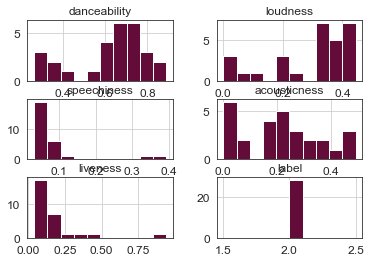

In [25]:
songs[songs['label']==2].hist()

In [26]:
songs[songs['label']==3].mean()

danceability    0.707667
loudness        0.728227
speechiness     0.093332
acousticness    0.327348
liveness        0.146304
label           3.000000
dtype: float64

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

X = songs_features
y = y_kmeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [28]:
# Predicting the Test set results
y_pred = rfc.predict(X_test)
    

In [29]:


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[ 6  0  0  0]
 [ 0 31  0  3]
 [ 0  0  9  0]
 [ 0  0  0 22]]


<AxesSubplot:title={'center':'Confusion matrix for Random Forest'}, xlabel='Predicted label', ylabel='True label'>

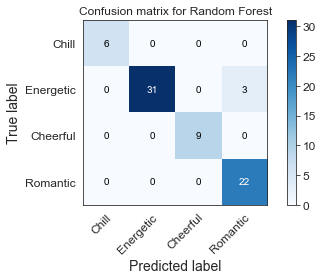

In [30]:
# Confusion matrix
definitions = ['Chill','Energetic','Cheerful','Romantic']
# reversefactor = dict(zip(range(4),definitions))
# actual = np.vectorize(reversefactor.get)(y_test)
# pred = np.vectorize(reversefactor.get)(y_pred)
# print(pd.crosstab(actual, pred, rownames=['Actual Mood'], colnames=['Predicted Mood']))

plot_confusion_matrix(y_test, y_pred, classes=definitions,
                      title='Confusion matrix for Random Forest')

In [31]:
# View a list of the features and their importance scores
features = songs_features.columns
list(zip(songs_features[features], rfc.feature_importances_))

[('danceability', 0.09295410477540454),
 ('loudness', 0.2727053713087466),
 ('speechiness', 0.04061382880526098),
 ('acousticness', 0.5141880142918449),
 ('liveness', 0.079538680818743)]

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [33]:
knn_pred =knn.predict(X_test)

Confusion matrix, without normalization
[[ 6  0  0  0]
 [ 0 32  0  2]
 [ 0  3  6  0]
 [ 0  0  0 22]]


<AxesSubplot:title={'center':'Confusion matrix for KNN'}, xlabel='Predicted label', ylabel='True label'>

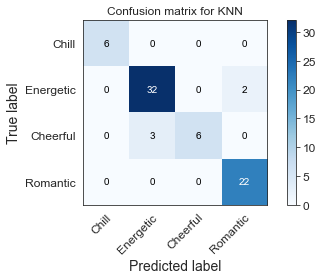

In [34]:
plot_confusion_matrix(y_test, knn_pred, classes=definitions,
                      title='Confusion matrix for KNN')

In [35]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
svm = svm.SVC(kernel="linear") 

#Train the model using the training sets
svm.fit(X_train, y_train)

#Predict the response for test dataset
svm_pred = svm.predict(X_test)

Confusion matrix, without normalization
[[ 6  0  0  0]
 [ 0 34  0  0]
 [ 1  3  5  0]
 [ 0  1  0 21]]


<AxesSubplot:title={'center':'Confusion matrix for SVM'}, xlabel='Predicted label', ylabel='True label'>

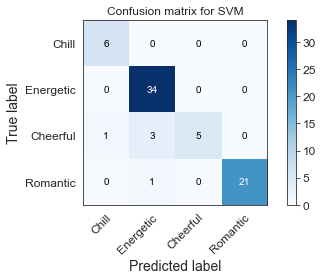

In [36]:
plot_confusion_matrix(y_test, svm_pred, classes=definitions,
                      title='Confusion matrix for SVM')

In [37]:
from sklearn.neural_network import MLPClassifier

In [38]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

C:\Users\vijay\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier()

In [39]:
mlp_pred = mlp.predict(X_test)

Confusion matrix, without normalization
[[ 6  0  0  0]
 [ 0 31  0  3]
 [ 1  6  1  1]
 [ 0  1  0 21]]


<AxesSubplot:title={'center':'Confusion matrix for MLP'}, xlabel='Predicted label', ylabel='True label'>

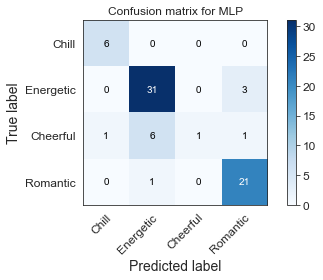

In [40]:
plot_confusion_matrix(y_test, mlp_pred, classes=definitions,
                      title='Confusion matrix for MLP')

In [41]:
print(classification_report(y_test,mlp_pred,target_names=definitions)+'MLP')

              precision    recall  f1-score   support

       Chill       0.86      1.00      0.92         6
   Energetic       0.82      0.91      0.86        34
    Cheerful       1.00      0.11      0.20         9
    Romantic       0.84      0.95      0.89        22

    accuracy                           0.83        71
   macro avg       0.88      0.74      0.72        71
weighted avg       0.85      0.83      0.79        71
MLP


In [42]:
print(classification_report(y_test,svm_pred,target_names=definitions)+'SVM')

              precision    recall  f1-score   support

       Chill       0.86      1.00      0.92         6
   Energetic       0.89      1.00      0.94        34
    Cheerful       1.00      0.56      0.71         9
    Romantic       1.00      0.95      0.98        22

    accuracy                           0.93        71
   macro avg       0.94      0.88      0.89        71
weighted avg       0.94      0.93      0.92        71
SVM


In [43]:
print(classification_report(y_test,knn_pred,target_names=definitions)+'KNN')

              precision    recall  f1-score   support

       Chill       1.00      1.00      1.00         6
   Energetic       0.91      0.94      0.93        34
    Cheerful       1.00      0.67      0.80         9
    Romantic       0.92      1.00      0.96        22

    accuracy                           0.93        71
   macro avg       0.96      0.90      0.92        71
weighted avg       0.93      0.93      0.93        71
KNN


In [44]:
print(classification_report(y_test,y_pred,target_names=definitions)+'forest')

              precision    recall  f1-score   support

       Chill       1.00      1.00      1.00         6
   Energetic       1.00      0.91      0.95        34
    Cheerful       1.00      1.00      1.00         9
    Romantic       0.88      1.00      0.94        22

    accuracy                           0.96        71
   macro avg       0.97      0.98      0.97        71
weighted avg       0.96      0.96      0.96        71
forest
